In [46]:
import pandas as pd

import os
'''****************************初始基本设置****************************'''
#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)
%matplotlib inline

In [19]:
# 获取每个数据集的回归结果并展示
# 具体的件路径续及时修改
result_path = ("E:\\毕设规划\\论文书写\\服务器结果\\results\\")
finanl_path = "E:\\毕设规划\\论文书写\\"
datafiles = ['KIBA', 'BindingDBIC50', 'Lenselink']
filelist = os.listdir(result_path)
dataset = datafiles[2]
drug_type = ["ECFP", "RDKit", "MolBert"]
drug_encoder = drug_type[1]
target_type = ['Glove', "SeqVec", 'UniRep']
target_encoder = target_type[2]
data = pd.read_csv(os.path.join(result_path, f"{dataset}_{drug_encoder}_{target_encoder}_{5}RegressionTaskScores.csv"))

data = data.T
data = data.rename(columns={0: 'RMSE',1: 'MSE', 2: 'MAE', 3: 'CI', 4: 'R2'})
data.sort_values(by=['R2', 'CI'], ascending=False, inplace=True)
for key in data.keys():
    data[key] = data[key].map(lambda x: x.split('±')[0])
data.to_csv(result_path +'final\\'+ dataset + '.csv', encoding='utf-8')
data


,RMSE,MSE,MAE,CI,R2
RandomForest,0.7321,0.5360,0.5537,0.8180,0.6670
Bagging,0.7780,0.6053,0.5875,0.8015,0.6239
XGBoost,0.7886,0.6218,0.6063,0.7967,0.6136
MLP,0.8202,0.6728,0.6311,0.7925,0.5820
LightGBM,0.8669,0.7516,0.6840,0.7733,0.5330
SVR,0.9112,0.8303,0.7083,0.7562,0.4841
GradientBoosting,1.0083,1.0167,0.8135,0.7208,0.3683
DecisionTree,1.0468,1.0958,0.7509,0.7480,0.3192
Ridge,1.0709,1.1468,0.8598,0.6887,0.2875


In [5]:
# 获取每个数据集的分类结果并展示
result_path = ("E:\\毕设规划\\论文书写\\服务器结果\\results\\")
finanl_path = "E:\\毕设规划\\论文书写\\"
datafiles = ['KIBA', 'BindingDBIC50', 'Lenselink']
filelist = os.listdir(result_path)
dataset = datafiles[1]
drug_type = ["ECFP", "RDKit", "MolBert"]
drug_encoder = drug_type[1]
target_type = ['Glove', "SeqVec", 'UniRep']
target_encoder = target_type[1]

data = pd.read_csv(os.path.join(result_path,f"{dataset}_{drug_encoder}_{target_encoder}_ClassificationTaskResults.csv"))
data = data.T
class_data = data.rename(columns={0: 'AUC', 1: 'AUPR', 2: 'MCC', 3: 'Accuracy', 4: 'F1_Score'})
class_data.sort_values(by=['F1_Score', 'MCC'], ascending=False, inplace=True)
for key in class_data.columns.tolist():
    class_data[key] = class_data[key].map(lambda x: x.split('±')[0])
class_data.to_csv(result_path +'final\\'+ dataset + '_Class.csv', encoding='utf-8')
class_data

,AUC,AUPR,MCC,Accuracy,F1_Score
Random Forest,0.8299,0.6781,0.6745,0.8620,0.8604
LightGBM,0.8272,0.6746,0.6701,0.8603,0.8586
XGBoost,0.8167,0.6575,0.6498,0.8519,0.8500
Histogram Gradient Boosting,0.8126,0.6540,0.6448,0.8502,0.8479
Gradient Boosting,0.7902,0.6204,0.6030,0.8333,0.8302
Logistic,0.7576,0.5697,0.5372,0.8064,0.8023
Decision Tree,0.7719,0.5694,0.5420,0.8018,0.8021
SVMC,0.7532,0.5684,0.5345,0.8064,0.8012
AdaBoost,0.7512,0.5583,0.5219,0.7997,0.7959


In [10]:
# 获取BindingDB数据集的文件目录
result_path = ("E:\\毕设规划\\论文书写\\服务器结果\\results\\")
finanl_path = "E:\\毕设规划\\论文书写\\"
datafiles = ['KIBA', 'BindingDBIC50', 'Lenselink']
filelist = os.listdir(result_path)
dataset = datafiles[1]
data_filelist = []
class_task = "ClassificationTaskResults.csv"
regression_task = "5RegressionTaskScores.csv"
class_files = []
regression_files = []
for file in filelist:
    file_split = file.split('_')
    if dataset in file_split and class_task in file.split("_"):
        class_files.append(file)
    if dataset in file_split and regression_task in file_split:
        regression_files.append(file)
class_files
regression_files

['BindingDBIC50_ECFP_Glove_5RegressionTaskScores.csv',
 'BindingDBIC50_ECFP_SeqVec_5RegressionTaskScores.csv',
 'BindingDBIC50_ECFP_UniRep_5RegressionTaskScores.csv',
 'BindingDBIC50_MolBert_Glove_5RegressionTaskScores.csv',
 'BindingDBIC50_MolBert_SeqVec_5RegressionTaskScores.csv',
 'BindingDBIC50_MolBert_UniRep_5RegressionTaskScores.csv',
 'BindingDBIC50_RDKit_Glove_5RegressionTaskScores.csv',
 'BindingDBIC50_RDKit_SeqVec_5RegressionTaskScores.csv',
 'BindingDBIC50_RDKit_UniRep_5RegressionTaskScores.csv']

In [16]:
# 获取药物靶标编码格式
encoder_list = []
for file in class_files:
    file_split = file.split('_')[1:3]
    encoder = file_split[0]+'+'+file_split[1]
    encoder_list.append(encoder)
encoder_list

['ECFP+Glove',
 'ECFP+SeqVec',
 'ECFP+UniRep',
 'MolBert+Glove',
 'MolBert+SeqVec',
 'MolBert+UniRep',
 'RDKit+Glove',
 'RDKit+SeqVec',
 'RDKit+UniRep']

In [37]:
# 整合三大模型的分类结果
cls_data = pd.DataFrame()
model_selection = ["Decision Tree", "XGBoost", "LightGBM"]
for encoder, cls in zip(encoder_list, class_files):
    cls_df = pd.read_csv(os.path.join(result_path, cls))
    cls_df = cls_df[model_selection]
    # cls_df = cls_df.rename(index={0: 'AUC', 1: 'AUPR', 2: 'MCC', 3: 'Accuracy', 4: 'F1_Score'})
    cls_df["Encoder_Type"] = encoder
    for key in cls_df.columns.tolist():
        cls_df[key] = cls_df[key].map(lambda x: x.split('±')[0])
    cls_data = pd.concat([cls_data, cls_df])
cls_data

,Decision Tree,XGBoost,LightGBM,Encoder_Type
0,0.7980,0.8048,0.8233,ECFP+Glove
1,0.6194,0.6405,0.6677,ECFP+Glove
2,0.6050,0.6287,0.6621,ECFP+Glove
3,0.8316,0.8434,0.8569,ECFP+Glove
4,0.8304,0.8410,0.8552,ECFP+Glove
0,0.7833,0.8151,0.8241,ECFP+SeqVec
1,0.5930,0.6607,0.6782,ECFP+SeqVec
2,0.5720,0.6522,0.6722,ECFP+SeqVec
3,0.8169,0.8535,0.8620,ECFP+SeqVec
4,0.8160,0.8510,0.8595,ECFP+SeqVec


In [38]:
# 整合三大模型的回归结果
reg_data = pd.DataFrame()
model_selection = ["DecisionTree", "XGBoost", "LightGBM"]
for encoder, regr in zip(encoder_list, regression_files):
    reg_df = pd.read_csv(os.path.join(result_path, regr))
    print(reg_df.head())
    reg_df = reg_df[model_selection]
    # reg_df = reg_df.rename(index={0: 'RMSE', 1: 'MSE', 2: 'MAE', 3: 'CI', 4: 'R2'})
    reg_df["Encoder_Type"] = encoder
    for key in reg_df.columns.tolist():
        reg_df[key] = reg_df[key].map(lambda x: x.split('±')[0])
    reg_data = pd.concat([reg_data, reg_df])
reg_data

           Ridge   DecisionTree            MLP GradientBoosting  \
0  0.9672±0.0000  0.8635±0.0075  0.7917±0.0275    0.8019±0.0010   
1  0.9355±0.0000  0.7457±0.0129  0.6268±0.0434    0.6431±0.0016   
2  0.7461±0.0000  0.5554±0.0082  0.5787±0.0180    0.6042±0.0012   
3  0.7516±0.0000  0.8059±0.0074  0.7925±0.0078    0.8012±0.0005   
4  0.4529±0.0000  0.5639±0.0076  0.6334±0.0254    0.6240±0.0010   

        LightGBM        Bagging        XGBoost   RandomForest            SVR  
0  0.6878±0.0000  0.6934±0.0194  0.6927±0.0000  0.6696±0.0064  0.8978±0.0000  
1  0.4731±0.0000  0.4809±0.0268  0.4798±0.0000  0.4484±0.0086  0.8061±0.0000  
2  0.4915±0.0000  0.4726±0.0201  0.4906±0.0000  0.4579±0.0061  0.6756±0.0000  
3  0.8305±0.0000  0.8350±0.0048  0.8333±0.0000  0.8417±0.0020  0.7579±0.0000  
4  0.7233±0.0000  0.7188±0.0157  0.7194±0.0000  0.7378±0.0050  0.5286±0.0000  
           Ridge   DecisionTree            MLP GradientBoosting  \
0  0.9124±0.0000  0.8868±0.0291  0.7432±0.0098    0.7996

,DecisionTree,XGBoost,LightGBM,Encoder_Type
0,0.8635,0.6927,0.6878,ECFP+Glove
1,0.7457,0.4798,0.4731,ECFP+Glove
2,0.5554,0.4906,0.4915,ECFP+Glove
3,0.8059,0.8333,0.8305,ECFP+Glove
4,0.5639,0.7194,0.7233,ECFP+Glove
0,0.8868,0.6940,0.6843,ECFP+SeqVec
1,0.7866,0.4816,0.4683,ECFP+SeqVec
2,0.5753,0.4872,0.4854,ECFP+SeqVec
3,0.8021,0.8345,0.8332,ECFP+SeqVec
4,0.5400,0.7184,0.7262,ECFP+SeqVec


In [14]:
# 导入绘图必需的库
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [99]:
ECFP_LIST = ["ECFP+Glove", "ECFP+SeqVec", "ECFP+UniRep"]
Glove_LIST = ["ECFP+Glove", "RDKit+Glove","MolBert+Glove"]
cls_metrics = ["AUC", "AUPR", "MCC", "Accuracy", "F1_Score"]
reg_metrics = ["RMSE", "MSE", "MAE", "CI", "R2"]
# model_name = "DecisionTree" # 回归专用
# model_name = "Decision Tree"
# model_name = "XGBoost"
# model_name = "LightGBM"

In [75]:
'''========================================绘制分类结果柱状图cls_data================================='''
font = {'family': 'Times New Roman', 'size': 18}
plt.rc('font', **font)

# 设置颜色类别
n_groups = 5
opacity = 0.8


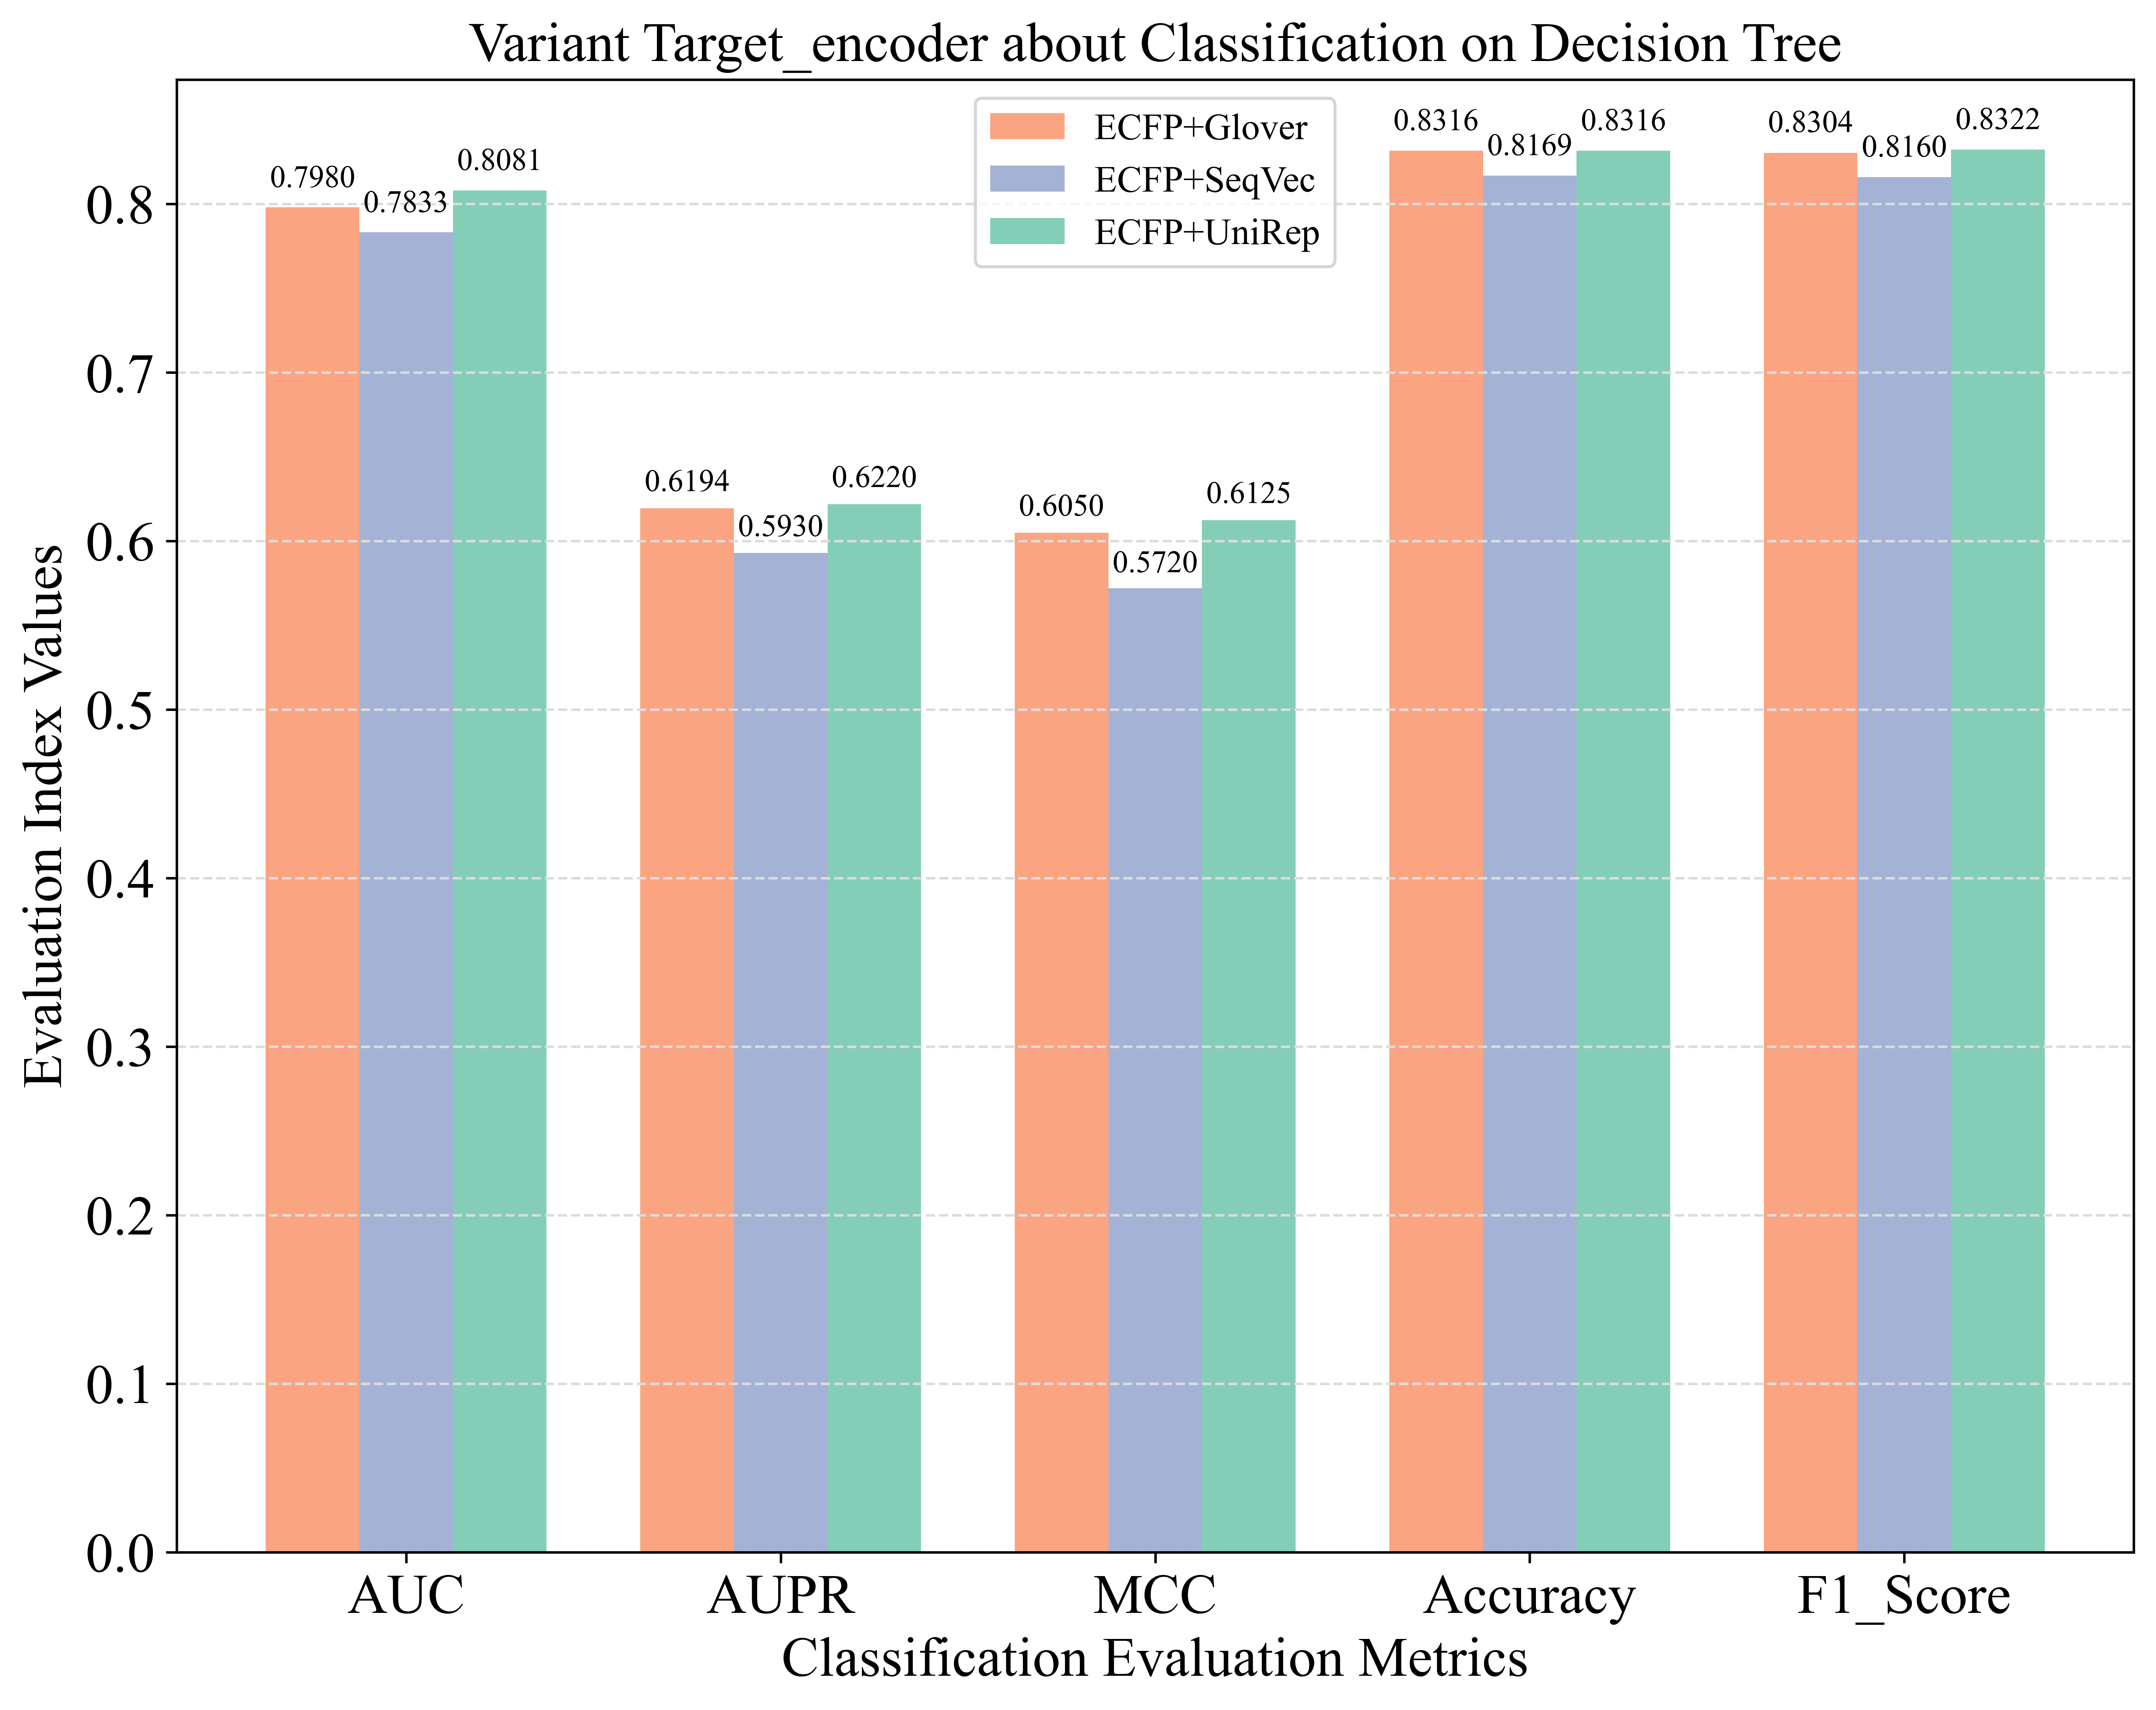

In [121]:
# 药物靶标比较结果
# 分类绘制
# 开始绘制
model_name = "Decision Tree"
# model_name = "XGBoost"
# model_name = "LightGBM"
fig, ax = plt.subplots(figsize=(10, 8), dpi = 600)
index = np.arange(n_groups)
bar_width = 0.25
drug_cls = cls_data[cls_data["Encoder_Type"].isin(ECFP_LIST)]
# 按分类模型完成绘制
drug_cls = drug_cls[model_name].map(float)

cls_glover = ax.bar(index, drug_cls.iloc[0:5], bar_width,capsize=3,
                alpha=opacity, color="#fb8d62",
                label="ECFP+Glover")
cls_seqvec = ax.bar(index+bar_width, drug_cls.iloc[5:10], bar_width,capsize=3,
                alpha=opacity, color="#8da0cb",
                label="ECFP+SeqVec")
cls_unirep = ax.bar(index+2*bar_width, drug_cls.iloc[10:15], bar_width,capsize=3,
                alpha=opacity, color="#66c2a5",
                label="ECFP+UniRep")

# 添加数据标签（显示在柱子上方中央）
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                '{:.4f}'.format(height),
                ha='center', va='bottom', fontsize=10)
autolabel(cls_glover)
autolabel(cls_seqvec)
autolabel(cls_unirep)
# 添加标签、标题和图例
ax.set_xlabel('Classification Evaluation Metrics',font)
ax.set_ylabel('Evaluation Index Values',font)
ax.set_title(f'Variant Target_encoder about Classification on {model_name}',fontsize=18, loc='center')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(cls_metrics)
ax.legend(loc='best',ncol=1,frameon=True,fontsize=12)

# 设置坐标轴字号为新罗马
for tick in ax.xaxis.get_minor_ticks():
    tick.label1.set_fontsize(16)
    tick.label1.set_fontname('Times New Roman')
    
for tick in ax.yaxis.get_minor_ticks():
    tick.label1.set_fontsize(16)
    tick.label1.set_fontname('Times New Roman')

plt.tight_layout()
plt.grid(axis="y", c="#dbdcde", linestyle="--")
plt.savefig(result_path +'final\\'+model_name+ '_target_ClassificationTaskResults.png', dpi=600)
plt.show()

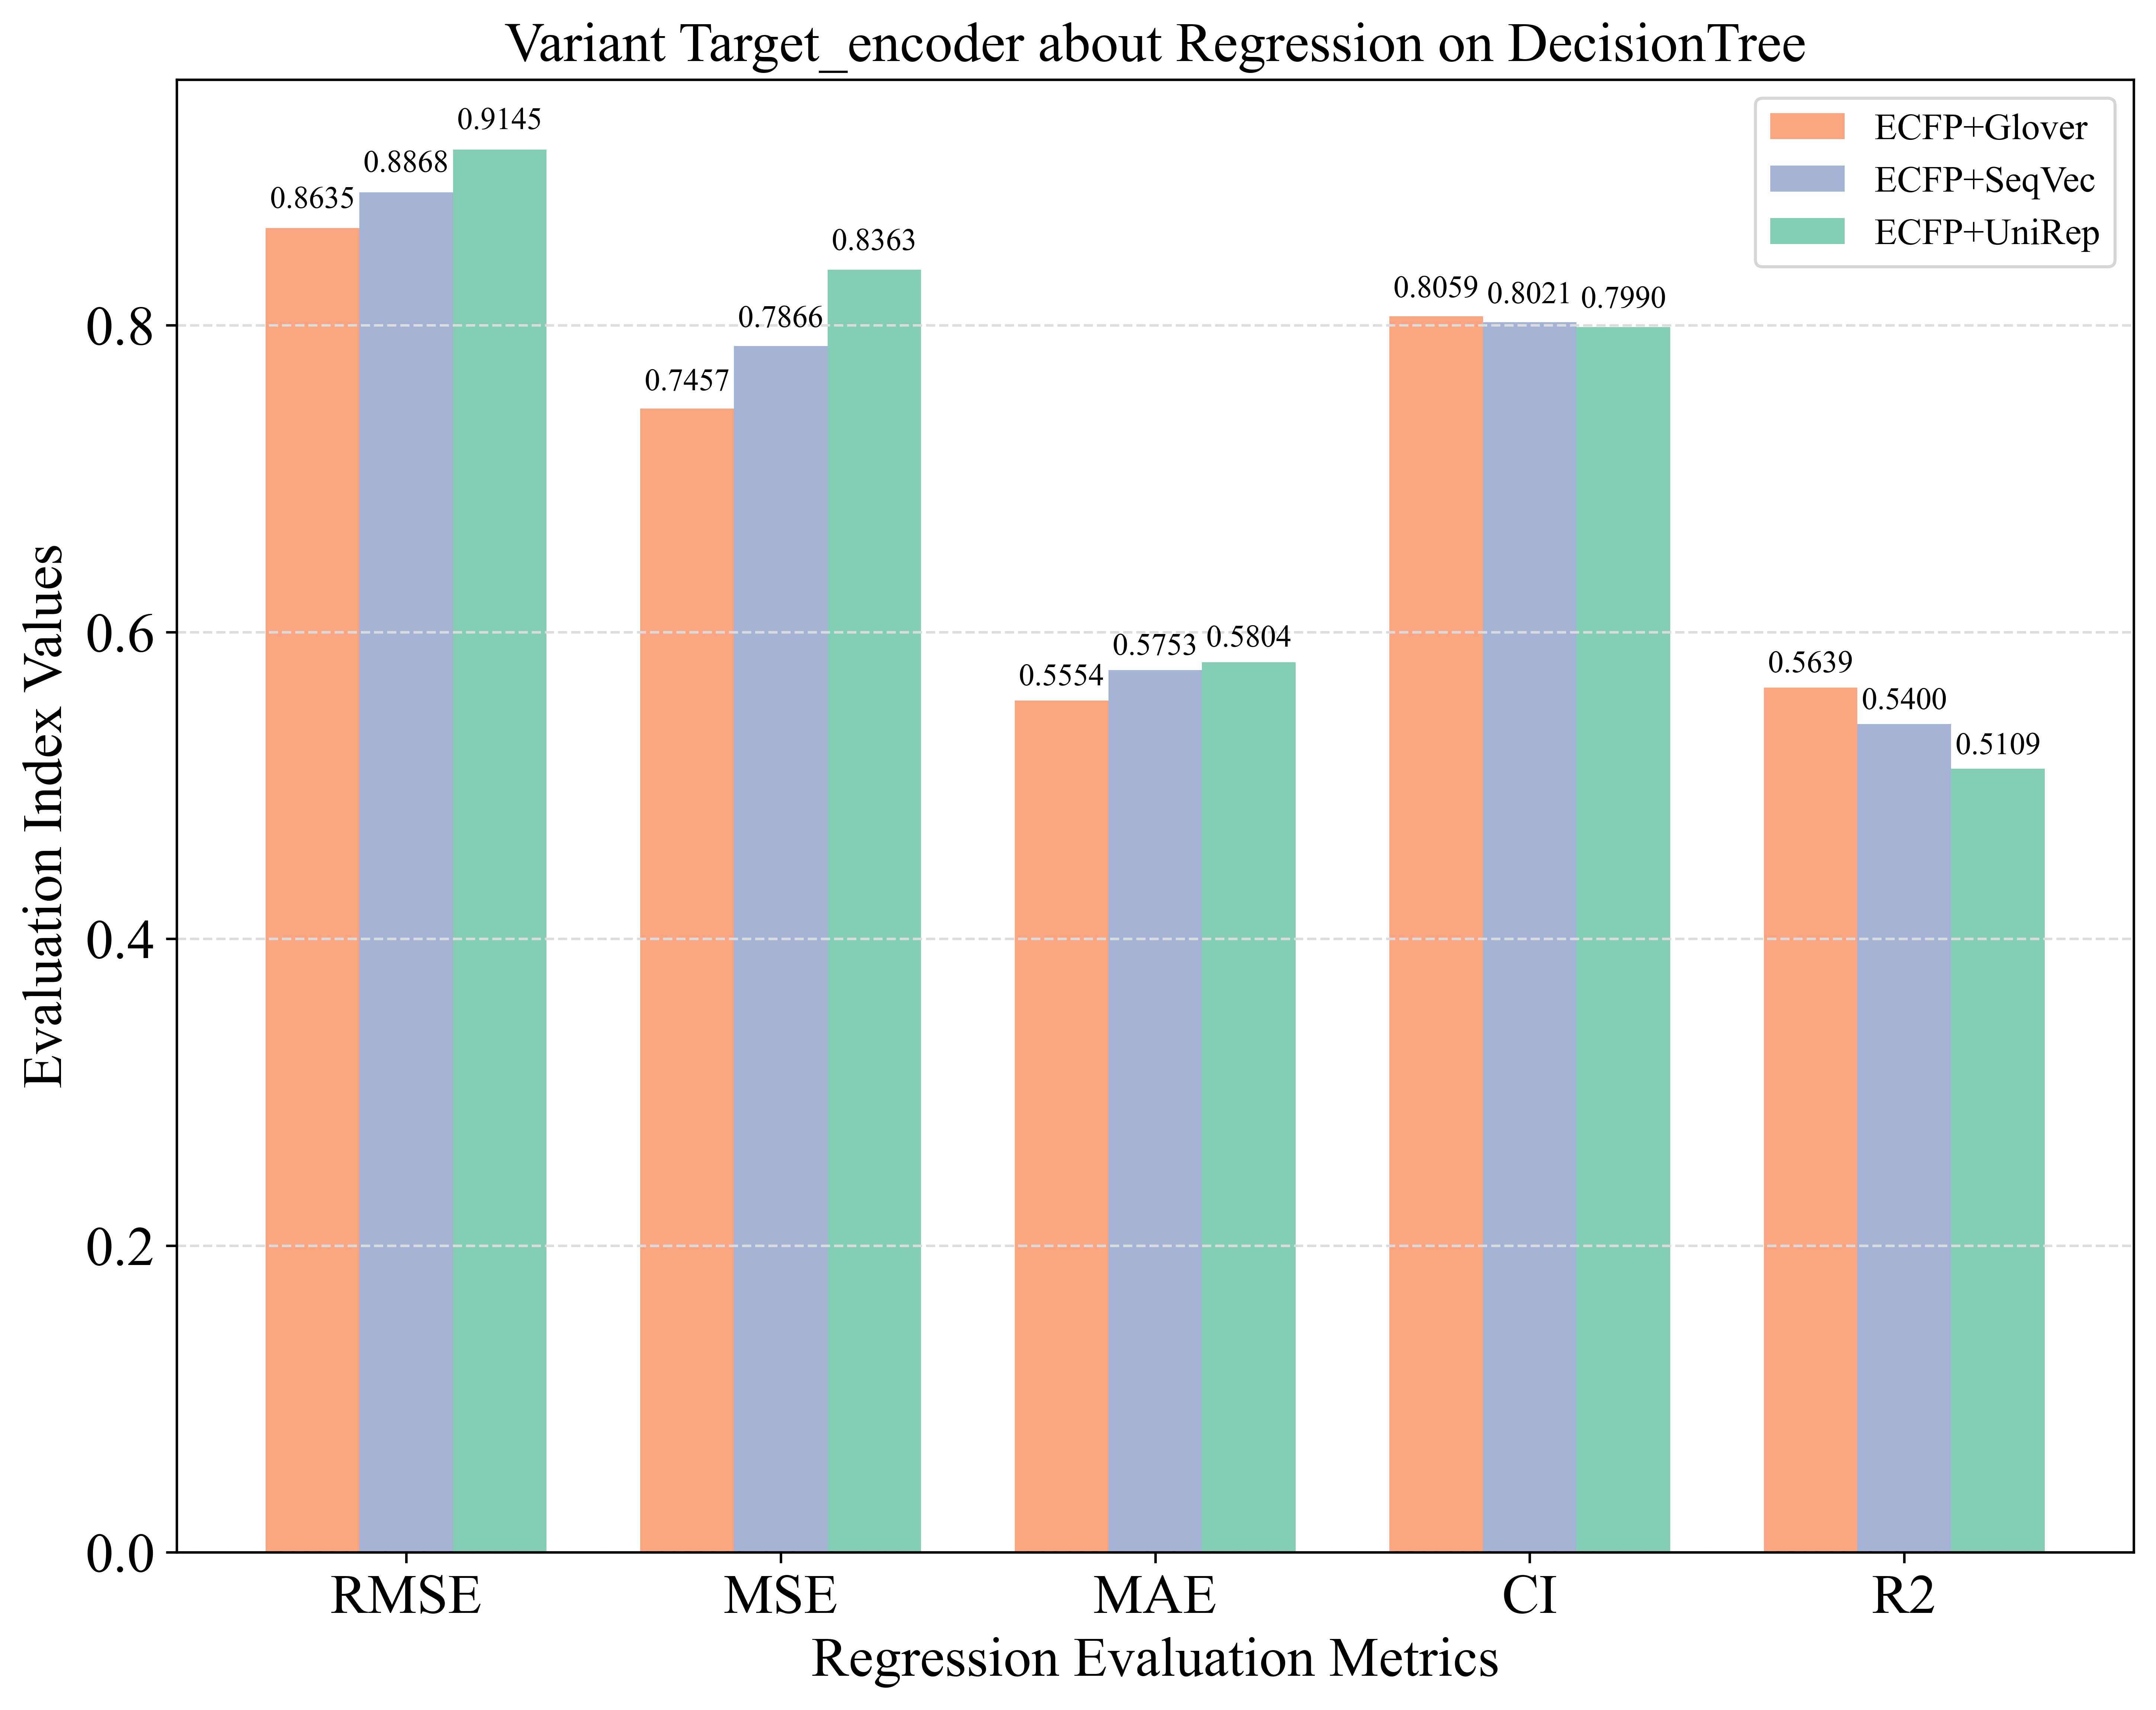

In [114]:
'''========================================绘制回归结果柱状图reg_data================================='''
# 药物靶标比较结果
# 回归绘制
# 开始绘制
model_name = "DecisionTree"
# model_name = "XGBoost"
# model_name = "LightGBM"
fig, ax = plt.subplots(figsize=(10, 8), dpi = 600)
index = np.arange(n_groups)
bar_width = 0.25
drug_reg = reg_data[cls_data["Encoder_Type"].isin(ECFP_LIST)]
# 按回归模型完成绘制
drug_reg = drug_reg[model_name].map(float)

reg_glover = ax.bar(index, drug_reg.iloc[0:5], bar_width,capsize=3,
                alpha=opacity, color="#fb8d62",
                label="ECFP+Glover")
reg_seqvec = ax.bar(index+bar_width, drug_reg.iloc[5:10], bar_width,capsize=3,
                alpha=opacity, color="#8da0cb",
                label="ECFP+SeqVec")
reg_unirep = ax.bar(index+2*bar_width, drug_reg.iloc[10:15], bar_width,capsize=3,
                alpha=opacity, color="#66c2a5",
                label="ECFP+UniRep")

# 添加数据标签（显示在柱子上方中央）
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                '{:.4f}'.format(height),
                ha='center', va='bottom', fontsize=10)
autolabel(reg_glover)
autolabel(reg_seqvec)
autolabel(reg_unirep)
# 添加标签、标题和图例
ax.set_xlabel('Regression Evaluation Metrics',font)
ax.set_ylabel('Evaluation Index Values',font)
ax.set_title(f'Variant Target_encoder about Regression on {model_name}',fontsize=18, loc='center')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(reg_metrics)
ax.legend(loc='best',ncol=1,frameon=True,fontsize=12)

# 设置坐标轴字号为新罗马
for tick in ax.xaxis.get_minor_ticks():
    tick.label1.set_fontsize(16)
    tick.label1.set_fontname('Times New Roman')
    
for tick in ax.yaxis.get_minor_ticks():
    tick.label1.set_fontsize(16)
    tick.label1.set_fontname('Times New Roman')

plt.tight_layout()
plt.grid(axis="y", c="#dbdcde", linestyle="--")
plt.savefig(result_path +'final\\'+model_name+ '_target_RegressionTaskResults.png', dpi=600)
plt.show()

In [92]:
target_cls = cls_data[cls_data["Encoder_Type"].isin(Glove_LIST)]
target_cls = target_cls[model_name].map(float)
target_cls


0    0.7980
1    0.6194
2    0.6050
3    0.8316
4    0.8304
0    0.7436
1    0.5301
2    0.4857
3    0.7774
4    0.7777
0    0.7831
1    0.5880
2    0.5667
3    0.8131
4    0.8131
Name: Decision Tree, dtype: float64

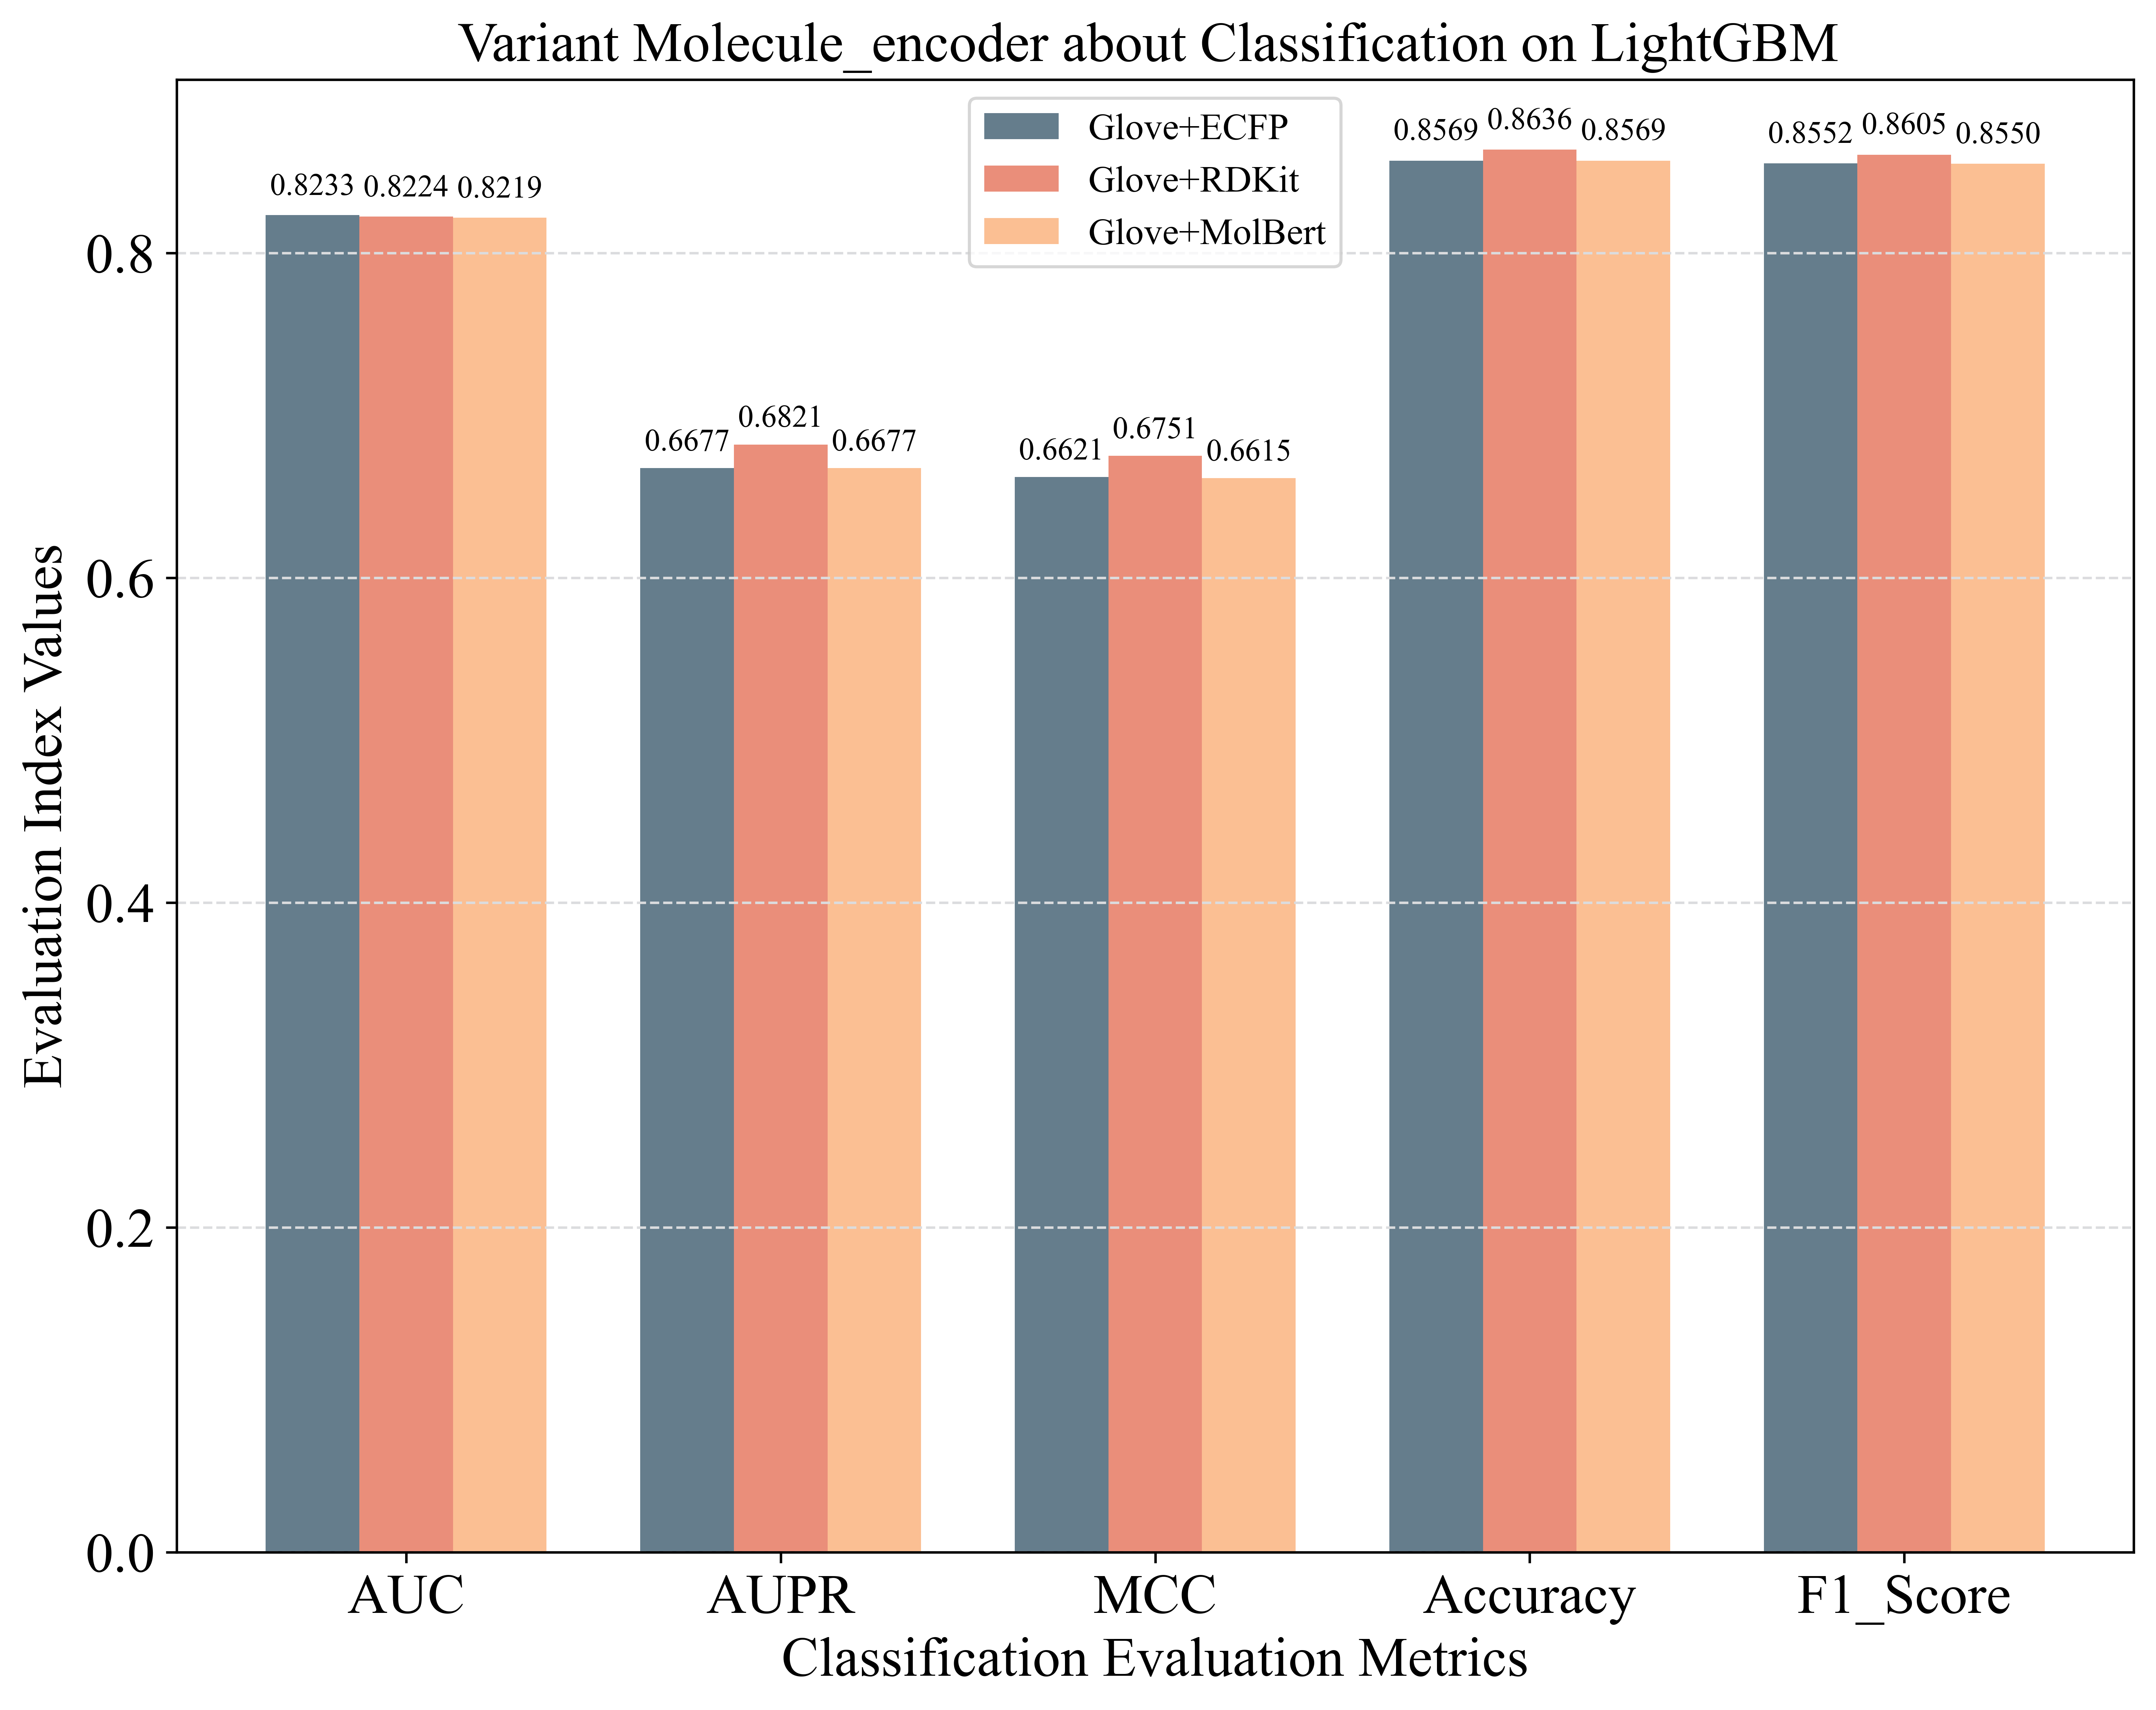

In [109]:
# 药物比较结果
# 分类绘制
# 开始绘制
# model_name = "Decision Tree"
# model_name = "XGBoost"
model_name = "LightGBM"
fig, ax = plt.subplots(figsize=(10, 8), dpi = 600)
index = np.arange(n_groups)
bar_width = 0.25
target_cls = cls_data[cls_data["Encoder_Type"].isin(Glove_LIST)]
target_cls = target_cls[model_name].map(float)
# 按分类模型完成绘制

cls_glover = ax.bar(index, target_cls.iloc[0:5], bar_width,capsize=3,
                alpha=opacity, color="#3E5D70",
                label="Glove+ECFP")
cls_seqvec = ax.bar(index+bar_width, target_cls.iloc[5:10], bar_width,capsize=3,
                alpha=opacity, color="#E57259",
                label="Glove+RDKit")
cls_unirep = ax.bar(index+2*bar_width, target_cls.iloc[10:15], bar_width,capsize=3,
                alpha=opacity, color="#FAAF78",
                label="Glove+MolBert")

# 添加数据标签（显示在柱子上方中央）
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                '{:.4f}'.format(height),
                ha='center', va='bottom', fontsize=10)
autolabel(cls_glover)
autolabel(cls_seqvec)
autolabel(cls_unirep)
# 添加标签、标题和图例
ax.set_xlabel('Classification Evaluation Metrics',font)
ax.set_ylabel('Evaluation Index Values',font)
ax.set_title(f'Variant Molecule_encoder about Classification on {model_name} ',fontsize=18, loc='center')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(cls_metrics)
ax.legend(loc='best',ncol=1,frameon=True,fontsize=12)

# 设置坐标轴字号为新罗马
for tick in ax.xaxis.get_minor_ticks():
    tick.label1.set_fontsize(16)
    tick.label1.set_fontname('Times New Roman')
    
for tick in ax.yaxis.get_minor_ticks():
    tick.label1.set_fontsize(16)
    tick.label1.set_fontname('Times New Roman')

plt.tight_layout()
plt.grid(axis="y", c="#dbdcde", linestyle="--")
plt.savefig(result_path +'final\\'+model_name+ '_drug_ClassificationTaskResults.png', dpi=600)
plt.show()

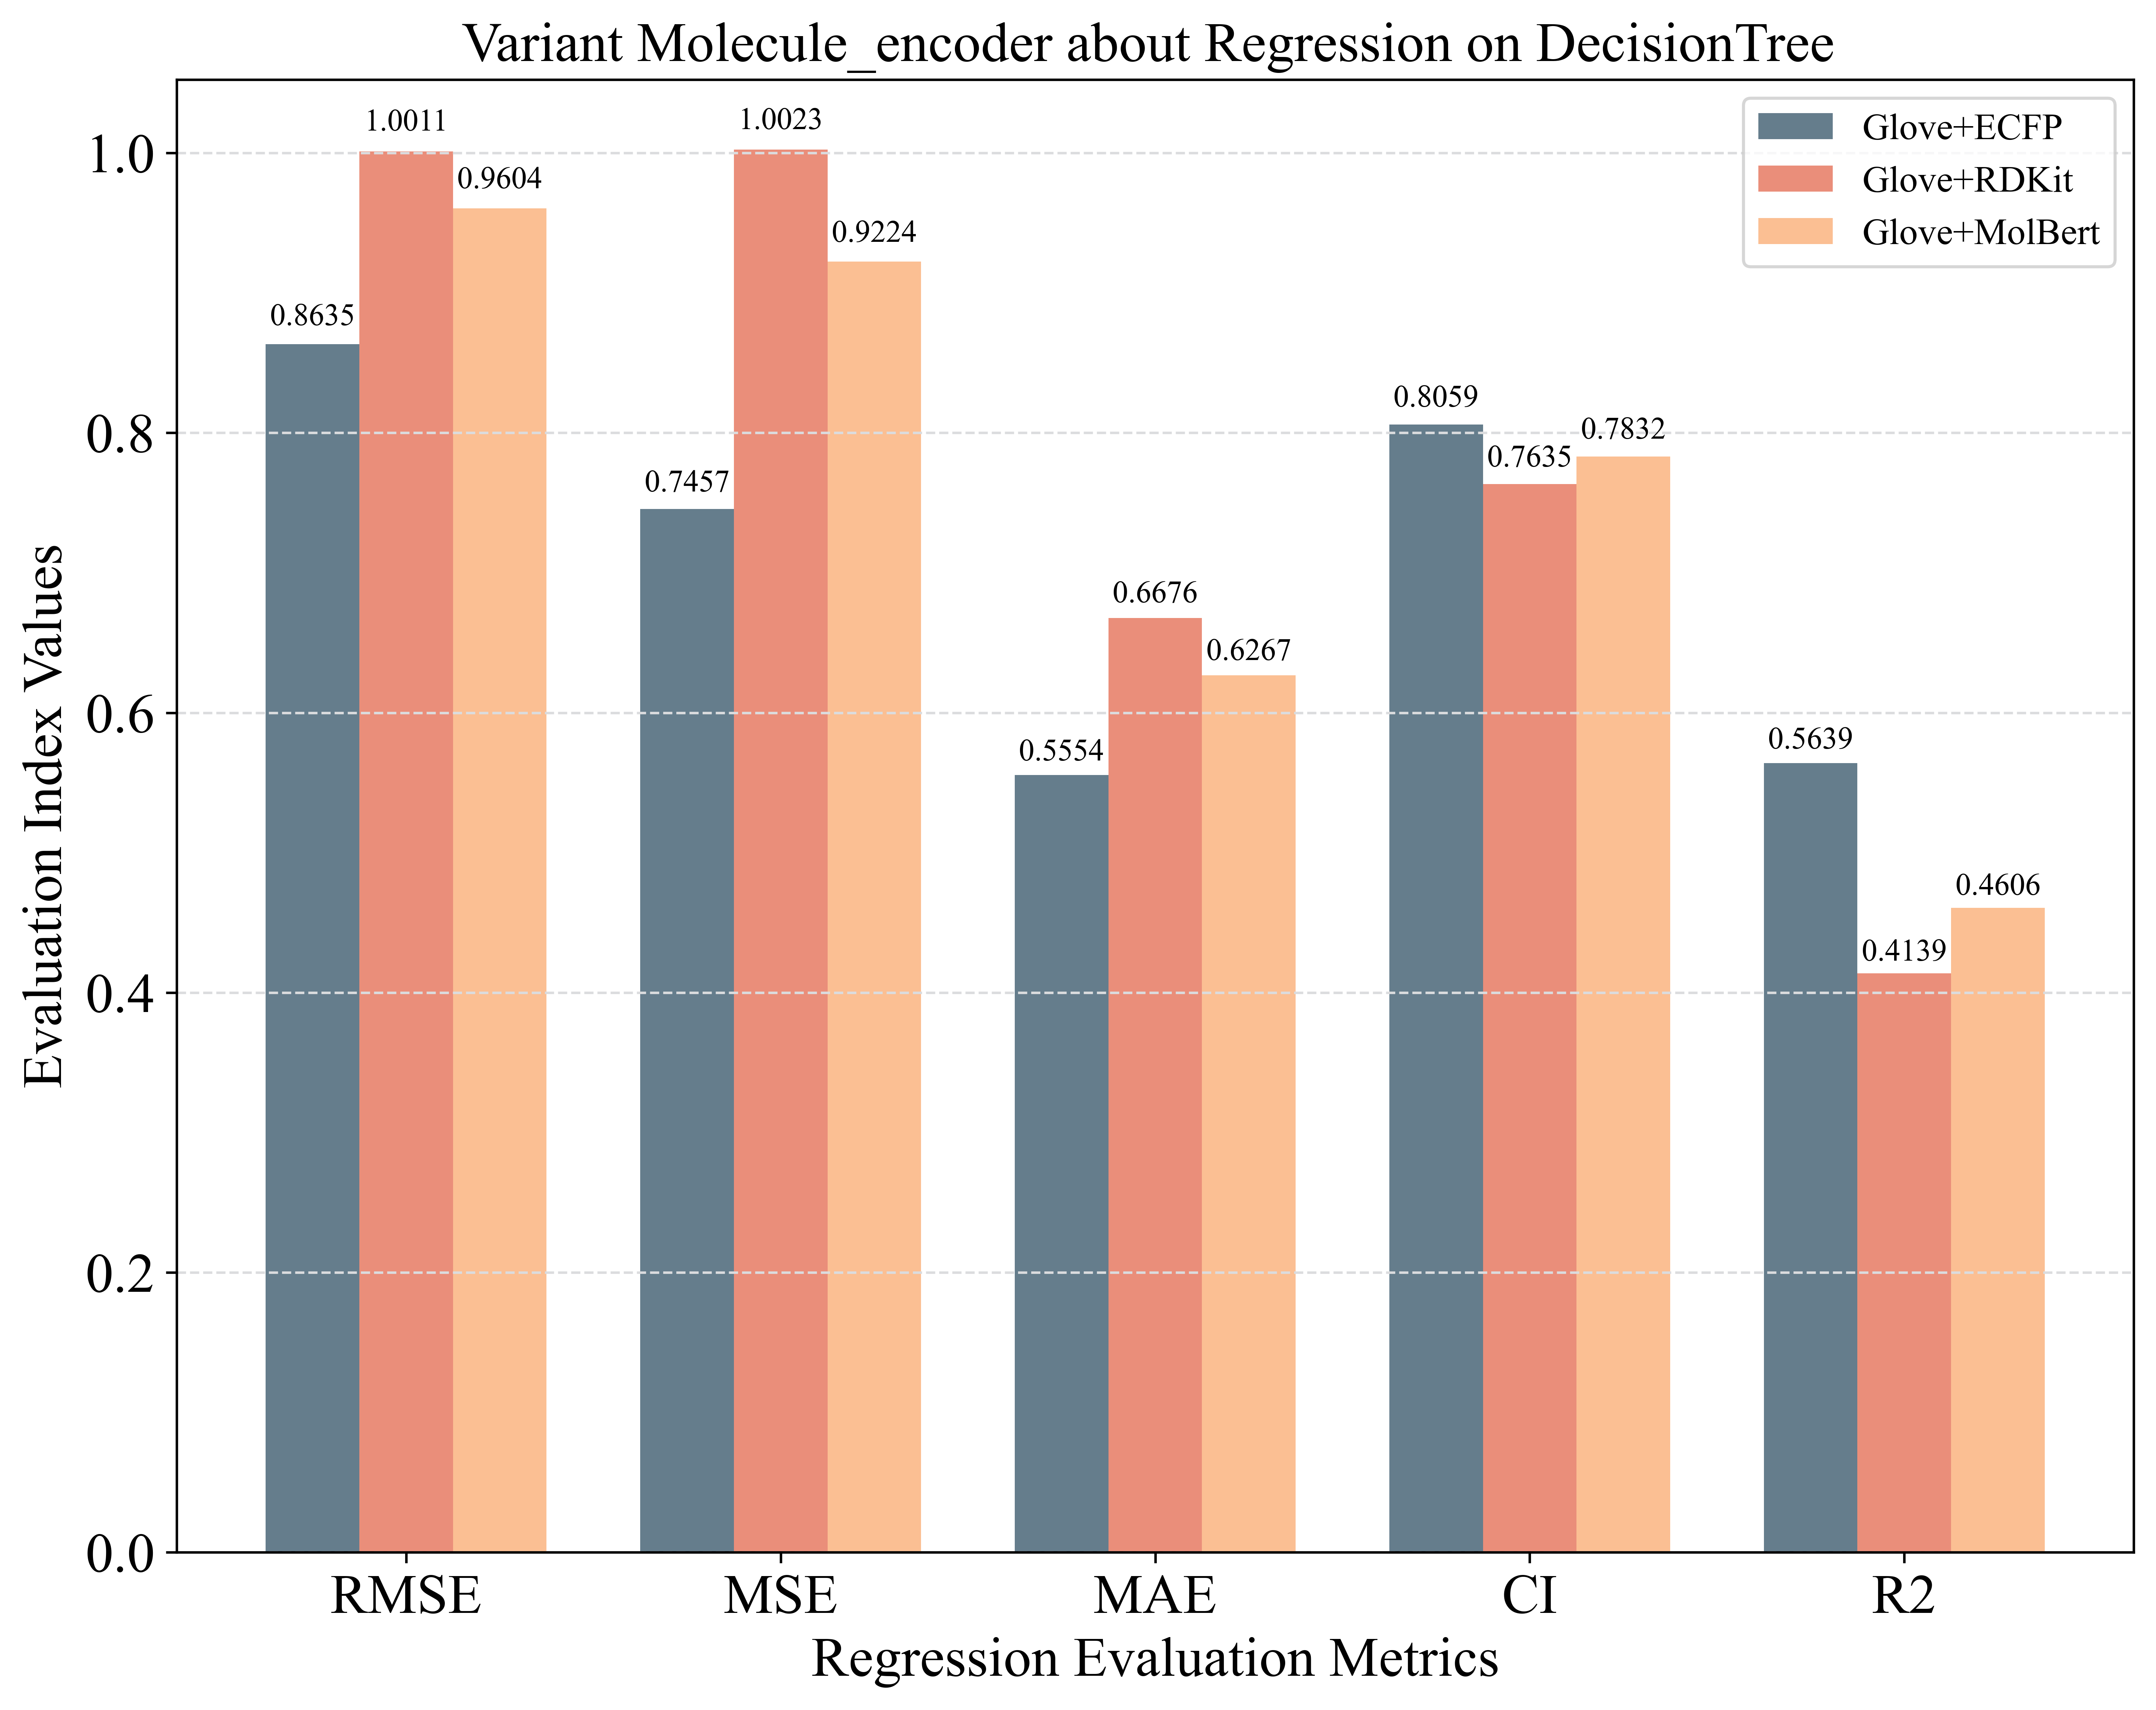

In [105]:
# 药物比较结果
# 回归绘制
# 开始绘制
model_name = "DecisionTree" # 回归专用
# model_name = "Decision Tree"
# model_name = "XGBoost"
# model_name = "LightGBM"
fig, ax = plt.subplots(figsize=(10, 8), dpi = 600)
index = np.arange(n_groups)
bar_width = 0.25
target_reg = reg_data[reg_data["Encoder_Type"].isin(Glove_LIST)]
target_reg = target_reg[model_name].map(float)
# 按分类模型完成绘制

cls_glover = ax.bar(index, target_reg.iloc[0:5], bar_width,capsize=3,
                alpha=opacity, color="#3E5D70",
                label="Glove+ECFP")
cls_seqvec = ax.bar(index+bar_width, target_reg.iloc[5:10], bar_width,capsize=3,
                alpha=opacity, color="#E57259",
                label="Glove+RDKit")
cls_unirep = ax.bar(index+2*bar_width, target_reg.iloc[10:15], bar_width,capsize=3,
                alpha=opacity, color="#FAAF78",
                label="Glove+MolBert")

# 添加数据标签（显示在柱子上方中央）
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                '{:.4f}'.format(height),
                ha='center', va='bottom', fontsize=10)
autolabel(cls_glover)
autolabel(cls_seqvec)
autolabel(cls_unirep)
# 添加标签、标题和图例
ax.set_xlabel('Regression Evaluation Metrics',font)
ax.set_ylabel('Evaluation Index Values',font)
ax.set_title(f'Variant Molecule_encoder about Regression on {model_name} ',fontsize=18, loc='center')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(reg_metrics)
ax.legend(loc='best',ncol=1,frameon=True,fontsize=12)

# 设置坐标轴字号为新罗马
for tick in ax.xaxis.get_minor_ticks():
    tick.label1.set_fontsize(16)
    tick.label1.set_fontname('Times New Roman')
    
for tick in ax.yaxis.get_minor_ticks():
    tick.label1.set_fontsize(16)
    tick.label1.set_fontname('Times New Roman')

plt.tight_layout()
plt.grid(axis="y", c="#dbdcde", linestyle="--")
plt.savefig(result_path +'final\\' +model_name+ '_drug_RegressionTaskResults.png', dpi=600)
plt.show()